In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Analyze and Making Prediction of Tech Stocks
Analyzing the Stocks of Facebook, Apple, Amazon, Netflix, and Google companies in this Notebook.
Here are some given below points that will be addressed in this Notebook.
- What was the change in our stock’s price over time?
- What was the moving average of our stocks?
- What was the daily return average of a stock?
- What was the correlation between daily returns of different stocks?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future 'FAANG'-stock (Facebook, Apple, Amazon, Netflix, and Google) behavior?

In [3]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yfinance

In [5]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yfinance.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,499.194701,506.925497,491.041277,499.151992,499.151992,5.817010e+06
std,39.815512,40.084261,38.903306,39.439670,39.439670,3.873848e+06
min,399.529999,415.859985,393.600006,403.829987,403.829987,1.144000e+06
25%,480.739990,488.014999,475.684998,481.000000,481.000000,3.688300e+06
50%,501.619995,509.470001,493.500000,501.769989,501.769989,5.023800e+06
75%,528.570007,536.429993,520.250000,527.360016,527.360016,6.495350e+06
max,582.450012,593.289978,570.400024,586.340027,586.340027,3.263750e+07


In [7]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,3060.733987,3097.294492,3018.733025,3057.887882,3057.887882,4.293035e+06
std,296.469443,297.926263,291.108451,293.089670,293.089670,1.490155e+06
min,2256.379883,2326.979980,2256.379883,2286.040039,2286.040039,1.451900e+06
25%,3025.920044,3073.949951,2977.079956,3008.890015,3008.890015,3.170700e+06
50%,3146.479980,3182.000000,3105.719971,3138.830078,3138.830078,3.992800e+06
75%,3234.420044,3285.984985,3184.775024,3236.850098,3236.850098,5.090450e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,9.772600e+06


We are comparing above company's stocks in order to analyze their average stock prices and returns to perform a risk assessment of the stock in last 1 year.

In [9]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-04-27 to 2021-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### Changes in Stock Prices Over Time

##### *Adj Close:*
```
The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes
```

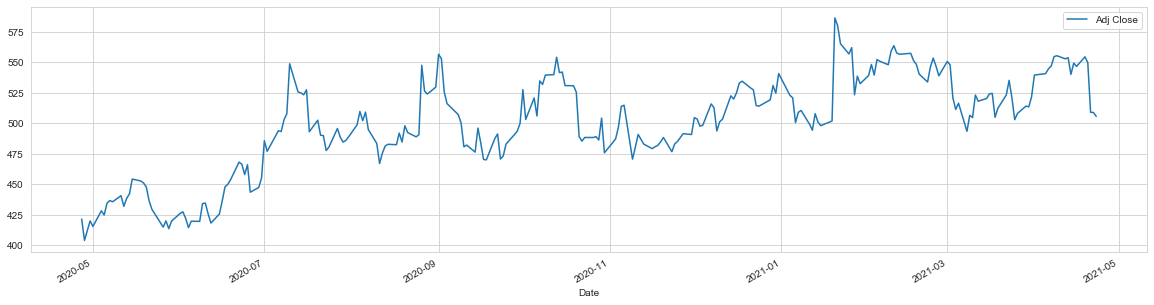

In [11]:
NFLX['Adj Close'].plot(legend = True, figsize = (20,5))

##### *Volume:*
```
Volume measures the number of shares traded in a stock or contracts traded in futures or options. Volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy
```

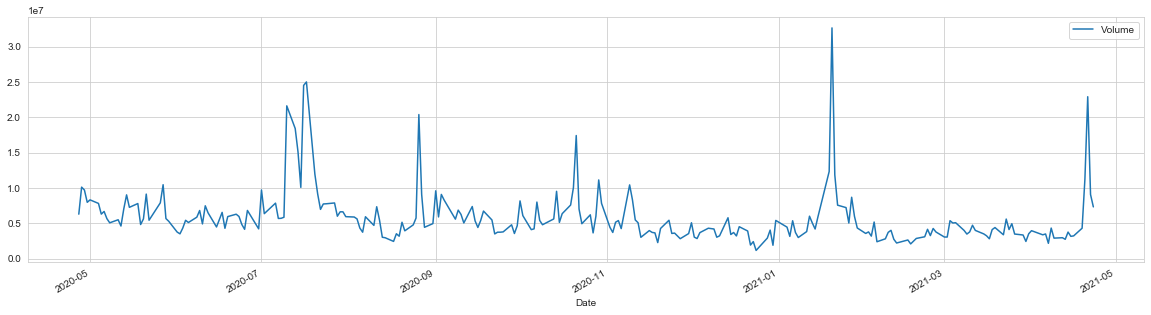

In [12]:
NFLX['Volume'].plot(legend = True, figsize = (20,5))

After a strong starting of year 2021, Netflix stock prices have fluctuated around $375 while its volume has decreased to around 600,000 shares per day. Now let's calculate a few different moving averages to smooth out variations in our data and obtain a better trend.

### Calculating Moving Avereages

In [23]:
averages = [10,25,50]
for avg in averages:
    label = "mAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [24]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,mAvg for 10 days,mAvg for 25 days,mAvg for 50 days
Date,,,,,,,,,,,,
2021-04-19,546.900024,556.440002,545.530029,554.440002,554.440002,4288700,549.814001,532.113600,534.930002,549.814001,532.113600,534.930002
2021-04-20,554.419983,563.559998,546.299988,549.570007,549.570007,11257600,550.317999,533.286400,534.905603,550.317999,533.286400,534.905603
2021-04-21,508.000000,515.460022,503.600006,508.899994,508.899994,22897400,546.509000,532.681199,534.125203,546.509000,532.681199,534.125203
2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,541.928998,532.054799,533.119403,541.928998,532.054799,533.119403
2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700,536.952997,532.085198,531.958602,536.952997,532.085198,531.958602


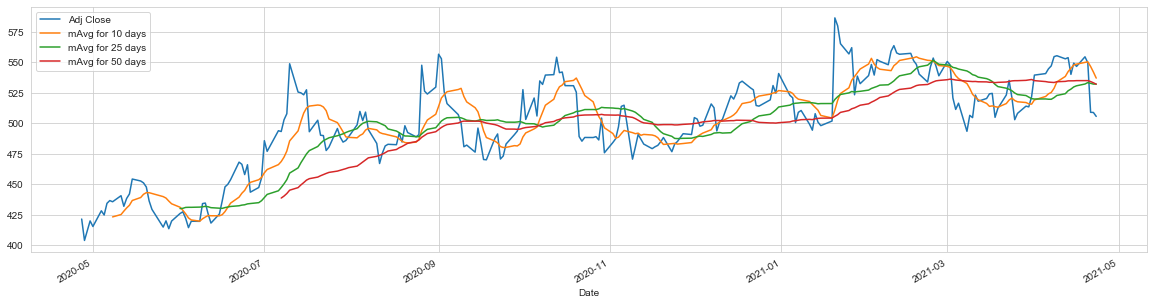

In [26]:
NFLX[['Adj Close', 'mAvg for 10 days', 'mAvg for 25 days', 'mAvg for 50 days']].plot(subplots = False, figsize = (20,5))

### Daily Return Average

In [27]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,mAvg for 10 days,mAvg for 25 days,mAvg for 50 days,Daily Return
Date,,,,,,,,,,,,,
2021-04-19,546.900024,556.440002,545.530029,554.440002,554.440002,4288700,549.814001,532.113600,534.930002,549.814001,532.113600,534.930002,0.014455
2021-04-20,554.419983,563.559998,546.299988,549.570007,549.570007,11257600,550.317999,533.286400,534.905603,550.317999,533.286400,534.905603,-0.008784
2021-04-21,508.000000,515.460022,503.600006,508.899994,508.899994,22897400,546.509000,532.681199,534.125203,546.509000,532.681199,534.125203,-0.074003
2021-04-22,513.820007,513.960022,500.549988,508.779999,508.779999,9061100,541.928998,532.054799,533.119403,541.928998,532.054799,533.119403,-0.000236
2021-04-23,509.010010,509.700012,500.700012,505.549988,505.549988,7307700,536.952997,532.085198,531.958602,536.952997,532.085198,531.958602,-0.006349


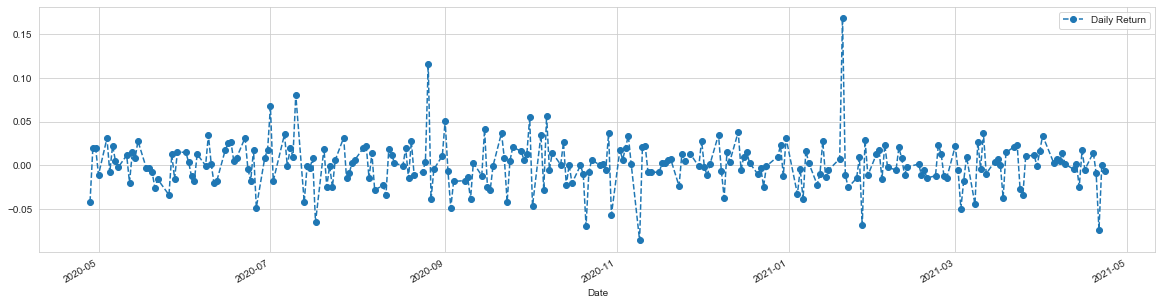

In [32]:
NFLX['Daily Return'].plot(figsize=(20,5),legend=True,linestyle='--',marker='o')

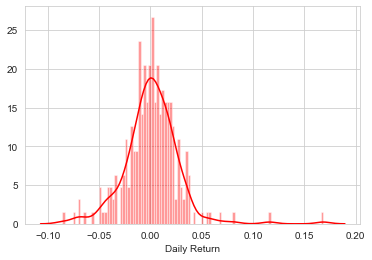

In [33]:
sns.distplot(NFLX['Daily Return'].dropna(),bins=100,color='red')

### Correlation between Different Daily Stock Returns
Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [35]:
close_compr = yfinance.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2021-04-19,0.005069,-0.008069,0.002019,-0.007670,0.014455
2021-04-20,-0.012830,-0.011068,-0.003809,-0.001855,-0.008784
2021-04-21,0.002930,0.008196,-0.000148,0.008983,-0.074003
2021-04-22,-0.011685,-0.015758,-0.011063,-0.013086,-0.000236
2021-04-23,0.018039,0.009622,0.020891,0.015476,-0.006349


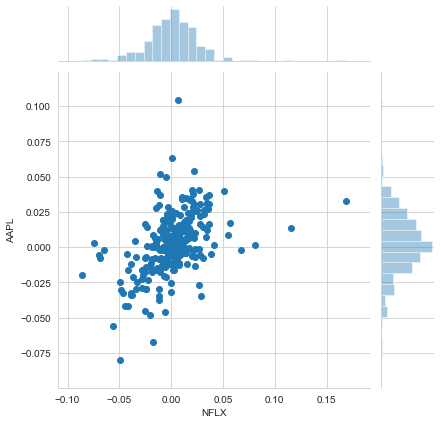

In [36]:
sns.jointplot('NFLX','AAPL',rets_compr,kind='scatter')

There seems to be a moderate correlation between Netflix and Apple returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

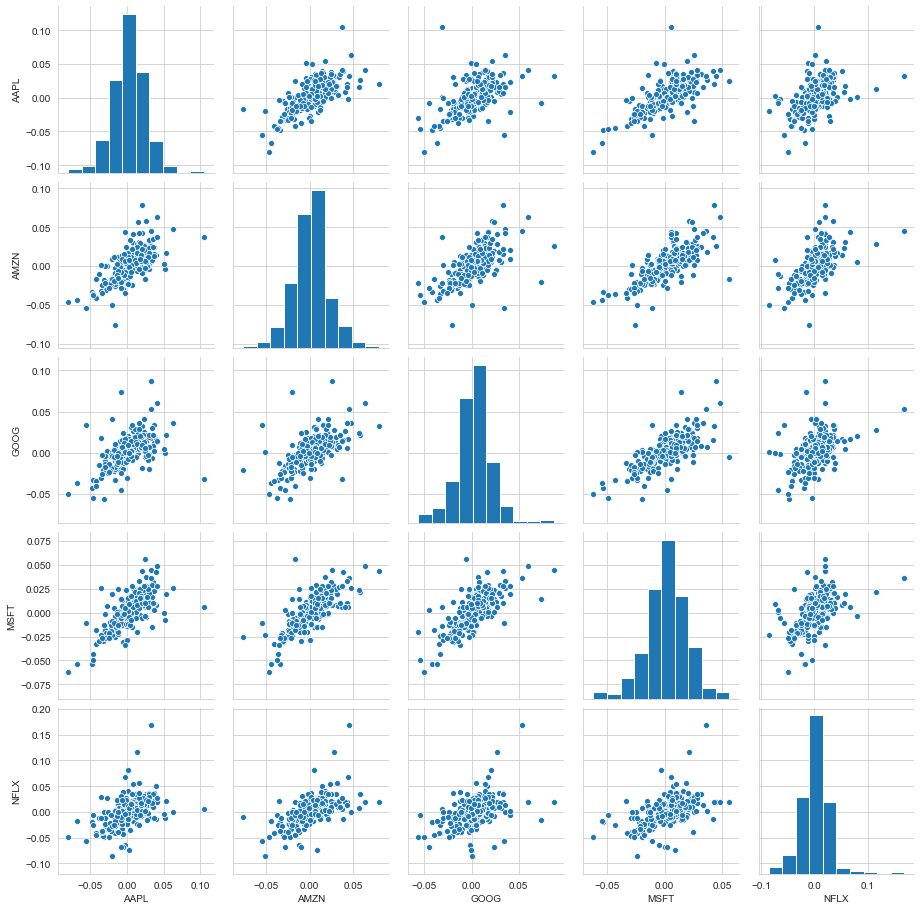

In [37]:
sns.pairplot(rets_compr.dropna())

There seems to be stronger correlations between Amazon and Microsoft, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

          AAPL      AMZN      GOOG      MSFT      NFLX
AAPL  1.000000  0.690286  0.517804  0.698685  0.467668
AMZN  0.690286  1.000000  0.613524  0.751700  0.611695
GOOG  0.517804  0.613524  1.000000  0.732732  0.448916
MSFT  0.698685  0.751700  0.732732  1.000000  0.513044
NFLX  0.467668  0.611695  0.448916  0.513044  1.000000


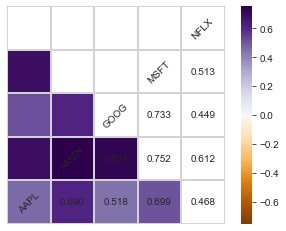

In [39]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

From the correlation heatmap, it becomes clear that Microsoft and Amazon share a stronger correlation, and in general Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

### Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

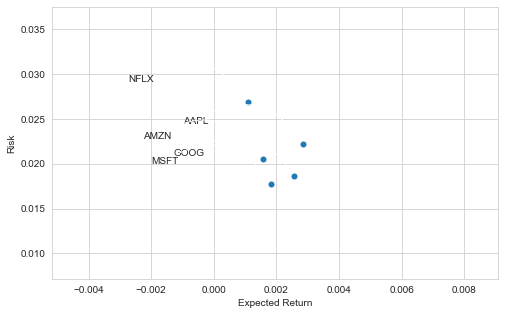

In [40]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

From this plot we can see that Microsoft has the highest expected return and the lowest risk -- a sign that it is the best stock to buy at the moment. With its overhaul of its cloud computing sectors and high-profile acquisitions, Microsoft stock is a clear winner here. Netflix's performance is more concerning as it has virtually zero positive expected return along with the highest risk.

We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [42]:
rets_compr.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2020-04-27,NaN,NaN,NaN,NaN,NaN
2020-04-28,-0.016209,-0.026061,-0.033083,-0.024361,-0.041649
2020-04-29,0.032845,0.025336,0.087390,0.044874,0.019959
2020-04-30,0.021096,0.042690,0.005352,0.010032,0.019326
2020-05-01,-0.016099,-0.075974,-0.020798,-0.025891,-0.010909


In [43]:
rets_compr['GOOG'].quantile(q=0.05)

-0.03064750954837199

In [44]:
rets_compr['GOOG'].quantile(q=0.01)

-0.04760219959115699

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 2.65 percent with 95% confidence and 5.04 percent with 99% confidence.

### Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [45]:

days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [46]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-27,1296.000000,1296.150024,1269.000000,1275.880005,1275.880005,1600600
2020-04-28,1287.930054,1288.050049,1232.199951,1233.670044,1233.670044,2951300
2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,1341.479980,3793600
2020-04-30,1324.880005,1352.819946,1322.489990,1348.660034,1348.660034,2668900
2020-05-01,1328.500000,1352.069946,1311.000000,1320.609985,1320.609985,2072500


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

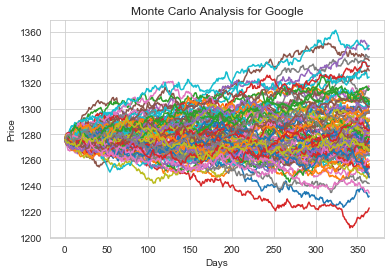

In [48]:
start_price = 1275.88 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

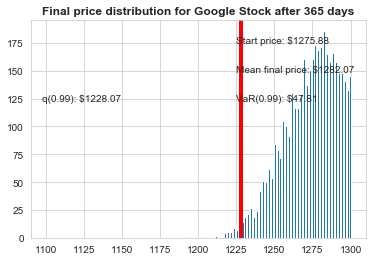

In [50]:
runs = 10000

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')